In [9]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import torch

In [34]:
def show_roc(run, ids):
    for i, id in enumerate(tqdm(ids)):
        output = pd.read_csv(f'../wearsed/training/baseline_conv/output/{run}/test_preds_epoch_{id}.csv')
        y_true, y_pred = output['targets'], output['predictions']
        y_true[y_true == 2] = 1
        fpr, tpr, thr = roc_curve(y_true, y_pred)
        plt.plot(fpr, tpr, label=f'Epoch {id}', color=(i/len(ids), 1-i/len(ids), 1))
    plt.plot([0,1], [0,1], color='green', linestyle='dashed', marker='o')
    plt.xlabel('False Positive Rate (1 - Specifity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.legend(loc='lower right')
    plt.title(run)
    plt.show()

100%|██████████| 10/10 [01:22<00:00,  8.21s/it]


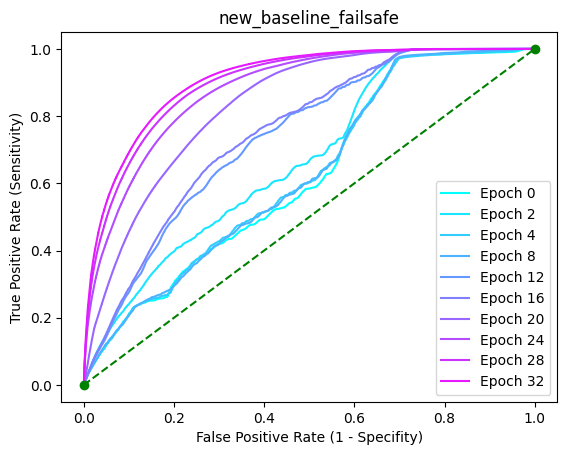

In [39]:
show_roc('new_baseline_failsafe', [0, 2, 4, 8, 12, 16, 20, 24, 28, 32])

100%|██████████| 10/10 [01:27<00:00,  8.72s/it]


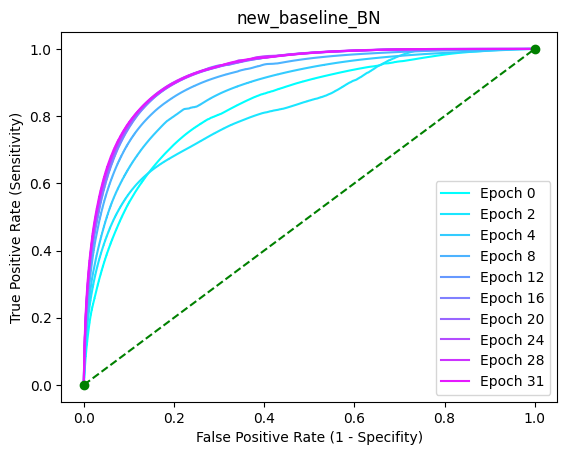

In [40]:
show_roc('new_baseline_BN', [0, 2, 4, 8, 12, 16, 20, 24, 28, 31])

100%|██████████| 33/33 [04:25<00:00,  8.03s/it]


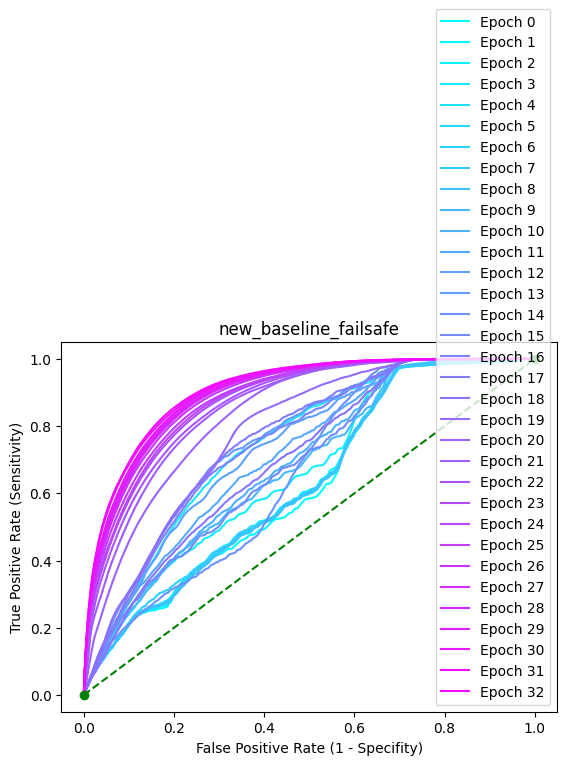

In [35]:
show_roc('new_baseline_failsafe', range(0, 33))